
=== COLOR BALANCING ===


Color balancing test/nofire: 100%|██████████| 251/251 [00:01<00:00, 137.68img/s]


Color balancing complete. Balanced dataset saved in: E:\SLIIT\Year 2 Semester 1\IT2011 - Artficial Intelligence and Machine Learning\Assignment\WildFireDetection\results\outputs\color_balanced


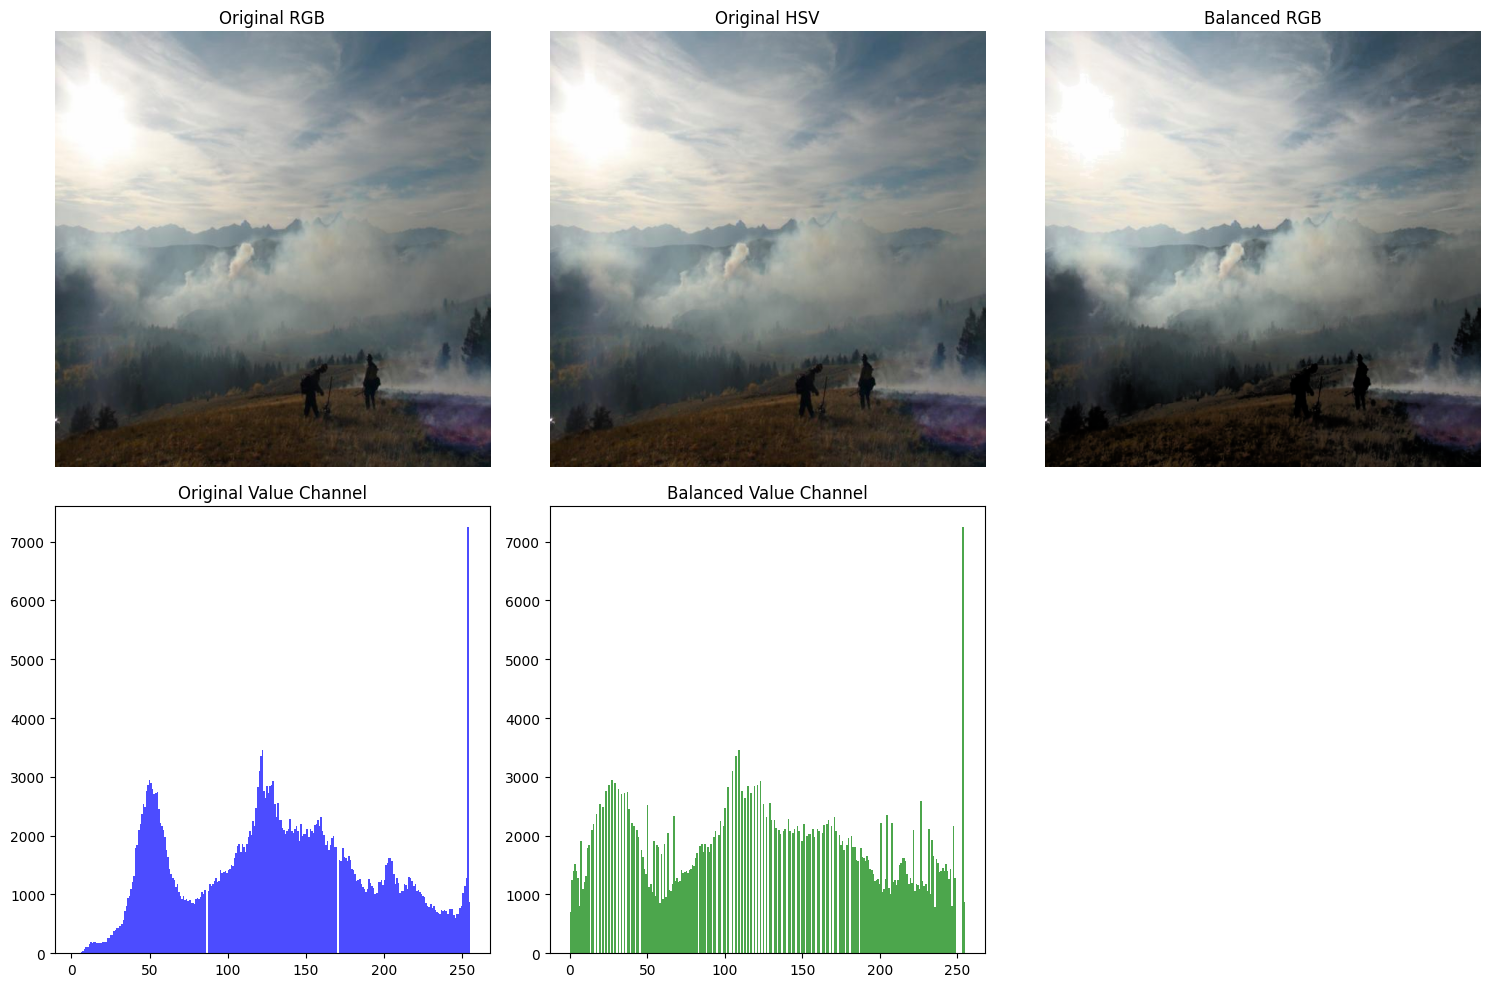

In [ ]:
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm

# Base directories (after cleaning step)
base_dir = 'E:\\SLIIT\\Year 2 Semester 1\\IT2011 - Artficial Intelligence and Machine Learning\\Assignment\\WildFireDetection\\results\\outputs\\resized'
color_dir = 'E:\\SLIIT\\Year 2 Semester 1\\IT2011 - Artficial Intelligence and Machine Learning\\Assignment\\WildFireDetection\\results\\outputs\\color_balanced'
splits = ['train', 'val', 'test']
classes = ['fire', 'nofire']

# -----------------------------
# 2. COLOR BALANCE
# -----------------------------
print("\n=== COLOR BALANCING ===")

for split in splits:
    for cls in classes:
        in_path = os.path.join(base_dir, split, cls)
        out_path = os.path.join(color_dir, split, cls)
        os.makedirs(out_path, exist_ok=True)
        
        img_files = [f for f in os.listdir(in_path) if f.endswith('.jpg')]
        
        for img_name in tqdm(img_files, desc=f"Color balancing {split}/{cls}", unit="img"):
            try:
                img = cv2.imread(os.path.join(in_path, img_name))
                hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
                hsv[:,:,2] = cv2.equalizeHist(hsv[:,:,2])
                balanced = cv2.cvtColor(hsv, cv2.COLOR_HSV2BGR)
                cv2.imwrite(os.path.join(out_path, img_name), balanced)
            except Exception as e:
                tqdm.write(f" Error processing {img_name}: {e}")

print("Color balancing complete. Balanced dataset saved in:", color_dir)

# ----------------------------
# EDA: Sample comparison
# ----------------------------
sample_path = os.path.join(base_dir, 'train', 'fire',
                           os.listdir(os.path.join(base_dir, 'train', 'fire'))[0])

# Read original image
original_bgr = cv2.imread(sample_path)
original_rgb = cv2.cvtColor(original_bgr, cv2.COLOR_BGR2RGB)  # Convert to RGB for visualization

# Apply color balancing for the sample
hsv = cv2.cvtColor(original_bgr, cv2.COLOR_BGR2HSV)
hsv[:,:,2] = cv2.equalizeHist(hsv[:,:,2])
balanced_bgr = cv2.cvtColor(hsv, cv2.COLOR_HSV2BGR)
balanced_rgb = cv2.cvtColor(balanced_bgr, cv2.COLOR_BGR2RGB)  # Convert to RGB for visualization

# Convert to HSV for histograms
hsv_original = cv2.cvtColor(original_bgr, cv2.COLOR_BGR2HSV)
hsv_balanced = cv2.cvtColor(balanced_bgr, cv2.COLOR_BGR2HSV)

# Plotting
fig, axs = plt.subplots(2, 3, figsize=(15, 10))

# Show images
axs[0, 0].imshow(original_rgb)
axs[0, 0].set_title('Original RGB')
axs[0, 0].axis('off')

axs[0, 1].imshow(cv2.cvtColor(hsv_original, cv2.COLOR_HSV2RGB))
axs[0, 1].set_title('Original HSV')
axs[0, 1].axis('off')

axs[0, 2].imshow(balanced_rgb)
axs[0, 2].set_title('Balanced RGB')
axs[0, 2].axis('off')

# Value channel histograms
axs[1, 0].hist(hsv_original[:, :, 2].ravel(), bins=256, color='blue', alpha=0.7)
axs[1, 0].set_title('Original Value Channel')

axs[1, 1].hist(hsv_balanced[:, :, 2].ravel(), bins=256, color='green', alpha=0.7)
axs[1, 1].set_title('Balanced Value Channel')

axs[1, 2].axis('off')

plt.tight_layout()
plt.savefig('E:\\SLIIT\\Year 2 Semester 1\\IT2011 - Artficial Intelligence and Machine Learning\\Assignment\\WildFireDetection\\results\\eda_visualizations\\color_conversion_opencv.png')
plt.show()